In [57]:
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [58]:
with open('./models/best_xgb_model.dat', 'rb') as f:
    model = pickle.load(f)

In [59]:
# Load training and testing data
y_scaler = float(open('y_scale_factor.txt','r').read())
X = pd.read_csv('./data/train_scale.csv',index_col=0)
y = pd.read_csv('./data/train.csv',index_col=0)['SalePrice']*y_scaler
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=8)

In [60]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1022, 318), (438, 318), (1022,), (438,))

In [61]:
r2_score(predicts,y_test)

0.8652012832445417

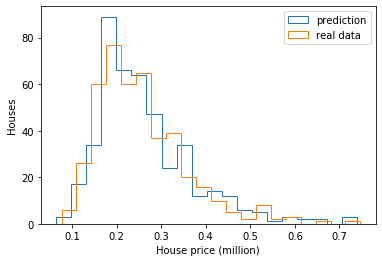

In [62]:
plt.hist(predicts, bins=20, histtype='step',label='prediction')
plt.hist(y_test,bins=20, histtype='step',label='real data')
plt.xlabel('House price (million)')
plt.ylabel('Houses')
plt.legend()

In [63]:
price_dif = pd.DataFrame({'dif': predicts-y_test})
# total price difference between predicted price and real data. 

sum(price_dif.dif)*y_scaler 

4.5735159198594904e-06

In [64]:
over_pricing = price_dif.loc[price_dif.dif < 0] # real price is higher than predicted price
under_pricing = price_dif.loc[price_dif.dif > 0] # real price is lower than predicted price

In [65]:
sum(over_pricing.dif)*y_scaler, sum(under_pricing.dif)*y_scaler

(-4.643615383869053e-06, 9.217131303728542e-06)

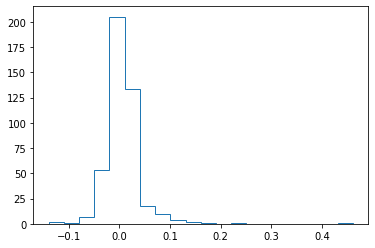

In [66]:
plt.hist(price_dif.dif, bins=20, histtype='step')
plt.show()

In [67]:
# this indicate a 4.57 Million higher of price compared with real data for a total of 438 houses
# average of ~10k more per hosue

In [69]:
percentage_increase = np.divide(price_dif.dif,y_test)

(array([  1.,   0.,  15.,  92., 208.,  85.,  23.,   7.,   2.,   1.,   1.,
          0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   1.]),
 array([-0.50462535, -0.3895256 , -0.27442584, -0.15932609, -0.04422634,
         0.07087342,  0.18597317,  0.30107292,  0.41617268,  0.53127243,
         0.64637219,  0.76147194,  0.87657169,  0.99167145,  1.1067712 ,
         1.22187095,  1.33697071,  1.45207046,  1.56717022,  1.68226997,
         1.79736972]),
 <a list of 1 Patch objects>)

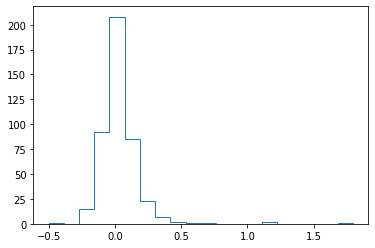

In [70]:
plt.hist(percentage_increase, bins=20, histtype='step')

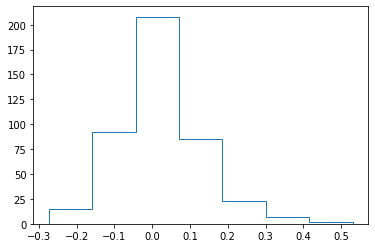

In [71]:
_ = plt.hist(percentage_increase, bins=[-0.27442584, -0.15932609, -0.04422634,
         0.07087342,  0.18597317,  0.30107292,  0.41617268,  0.53127243], histtype='step')

In [72]:
dif_percentage = pd.DataFrame({'dif':percentage_increase})

In [73]:
over_predicted = dif_percentage.loc[dif_percentage.dif>0.05]
under_predicted = dif_percentage.loc[dif_percentage.dif<-0.05]

In [74]:
over_predicted.shape,under_predicted.shape,dif_percentage.shape[0]

((159, 1), (101, 1), 438)

In [75]:
159/438,101/438

(0.363013698630137, 0.23059360730593606)